# Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# listings.csv Pre-processing

In [73]:
listings_df = pd.read_csv("../raw_data/listings.csv")
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.91
1,5858,https://www.airbnb.com/rooms/5858,20200815122856,2020-08-15,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.81
2,7918,https://www.airbnb.com/rooms/7918,20200815122856,2020-08-15,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,20200815122856,2020-08-15,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,10.0,9.0,9.0,NaN,f,9,0,9,0,0.11
4,8339,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.21


## Checking structure and data types

In [74]:
listings_df.shape

(7274, 74)

In [75]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7274 non-null   int64  
 1   listing_url                                   7274 non-null   object 
 2   scrape_id                                     7274 non-null   int64  
 3   last_scraped                                  7274 non-null   object 
 4   name                                          7274 non-null   object 
 5   description                                   7220 non-null   object 
 6   neighborhood_overview                         5330 non-null   object 
 7   picture_url                                   7274 non-null   object 
 8   host_id                                       7274 non-null   int64  
 9   host_url                                      7274 non-null   o

In [76]:
listings_df.infer_objects()
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7274 non-null   int64  
 1   listing_url                                   7274 non-null   object 
 2   scrape_id                                     7274 non-null   int64  
 3   last_scraped                                  7274 non-null   object 
 4   name                                          7274 non-null   object 
 5   description                                   7220 non-null   object 
 6   neighborhood_overview                         5330 non-null   object 
 7   picture_url                                   7274 non-null   object 
 8   host_id                                       7274 non-null   int64  
 9   host_url                                      7274 non-null   o

## Dropping unnecessary columns

In [77]:
listings_df.drop(['listing_url','scrape_id','last_scraped','picture_url','host_url',\
                  'host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed',\
                 'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',\
                 'maximum_maximum_nights','calendar_updated','license',\
                 'calculated_host_listings_count','calculated_host_listings_count_entire_homes',\
                 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'\
                 ],axis=1,inplace=True)
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7274 non-null   int64  
 1   name                         7274 non-null   object 
 2   description                  7220 non-null   object 
 3   neighborhood_overview        5330 non-null   object 
 4   host_id                      7274 non-null   int64  
 5   host_name                    7274 non-null   object 
 6   host_since                   7274 non-null   object 
 7   host_location                7269 non-null   object 
 8   host_about                   5475 non-null   object 
 9   host_response_time           5321 non-null   object 
 10  host_response_rate           5321 non-null   object 
 11  host_acceptance_rate         6393 non-null   object 
 12  host_is_superhost            7274 non-null   object 
 13  host_neighbourhood

## Fixing wrong data types

In [78]:
listings_df.select_dtypes(include=['object']).columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'instant_bookable'],
      dtype='object')

In [79]:
# str -> 'name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about','host_response_time', 
#        'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed',
#       'property_type', 'room_type', 'bathrooms_text'
# datetime -> 'host_since', 'calendar_last_scraped', 'first_review','last_review'
# % (float)-> 'host_response_rate', 'host_acceptance_rate'
# $ (int) -> 'price'
# bool -> 'host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability', 'instant_bookable'
# list -> 'host_verifications', 'amenities'

# # convert to str
# str_columns = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about','host_response_time', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed','property_type', 'room_type', 'bathrooms_text']
# listings_df[str_columns] = listings_df[str_columns].astype(str)

# convert to datetime
listings_df[['host_since', 'calendar_last_scraped', 'first_review','last_review']] =\
listings_df[['host_since', 'calendar_last_scraped', 'first_review','last_review']].apply(pd.to_datetime)

# convert % to float
listings_df['host_response_rate'] =\
listings_df['host_response_rate'].str.replace('%', '').astype(float)/100
listings_df['host_acceptance_rate'] =\
listings_df['host_acceptance_rate'].str.replace('%', '').astype(float)/100

# convert $ to float
listings_df['price']=listings_df['price'].apply(lambda x: x.replace('$', ''))
listings_df['price']=listings_df['price'].apply(lambda x: x.replace(',', '')).astype(float)

# convert to bool
bool_columns = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability', 'instant_bookable']
for column in bool_columns:
    listings_df[column] = np.where(listings_df[column] == "t", True, False)
                           
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           7274 non-null   int64         
 1   name                         7274 non-null   object        
 2   description                  7220 non-null   object        
 3   neighborhood_overview        5330 non-null   object        
 4   host_id                      7274 non-null   int64         
 5   host_name                    7274 non-null   object        
 6   host_since                   7274 non-null   datetime64[ns]
 7   host_location                7269 non-null   object        
 8   host_about                   5475 non-null   object        
 9   host_response_time           5321 non-null   object        
 10  host_response_rate           5321 non-null   float64       
 11  host_acceptance_rate         6393 non-null 

In [80]:
listings_df[['host_acceptance_rate','price','instant_bookable']].head()

,host_acceptance_rate,price,instant_bookable
0,0.99,132.0,False
1,0.83,235.0,False
2,1.00,56.0,False
3,1.00,56.0,False
4,0.00,750.0,False


## Checking and filling null values

In [81]:
listings_df.isnull().sum()

id                                0
name                              0
description                      54
neighborhood_overview          1944
host_id                           0
host_name                         0
host_since                        0
host_location                     5
host_about                     1799
host_response_time             1953
host_response_rate             1953
host_acceptance_rate            881
host_is_superhost                 0
host_neighbourhood              540
host_listings_count               0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                  1944
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        89
bathrooms_text              

In [82]:
na_columns = ['bathrooms','bedrooms','beds','review_scores_rating',\
            'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',\
            'review_scores_communication','review_scores_location','review_scores_value',\
            'reviews_per_month']
#listings_df[na_columns]=listings_df[na_columns].fillna(0)
for column in na_columns:
    listings_df[column].fillna(0,inplace=True) 

listings_df.isnull().sum()

id                                0
name                              0
description                      54
neighborhood_overview          1944
host_id                           0
host_name                         0
host_since                        0
host_location                     5
host_about                     1799
host_response_time             1953
host_response_rate             1953
host_acceptance_rate            881
host_is_superhost                 0
host_neighbourhood              540
host_listings_count               0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                  1944
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bathrooms_text              

## Importing cleaned data to pickle file

In [83]:
#listings_df.to_pickle('cleaned_listings.pkl')


pickle_listings_df = pd.read_pickle('cleaned_listings.pkl')
pickle_listings_df.head(5)

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,within an hour,...,2020-07-30,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1.91
1,5858,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,...,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,False,0.81
2,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within a few hours,...,2020-03-06,84.0,7.0,8.0,9.0,9.0,9.0,8.0,False,0.14
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within a few hours,...,2018-09-12,93.0,9.0,9.0,10.0,10.0,9.0,9.0,False,0.11
4,8339,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,24215,Rosy,2009-07-02,"San Francisco, California, United States",I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,...,2019-06-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,0.21


## Check for duplicate rows

In [84]:
pickle_listings_df[pickle_listings_df.duplicated()]

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month


# Pre-processing for Price Analysis

## Drop Irrelevant columns

In [85]:
relevant_columns = ["id","host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost",\
                   "host_listings_count","neighbourhood_cleansed","property_type","room_type",\
                   "accommodates","bathrooms","bedrooms","beds","amenities","price","minimum_nights","maximum_nights",\
                   "number_of_reviews","review_scores_rating","reviews_per_month"]
# print(len(relevant_columns))

for column in pickle_listings_df.columns:
    if column not in relevant_columns:
        pickle_listings_df.drop(column, axis=1,inplace=True)
pickle_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7274 non-null   int64  
 1   host_response_time      5321 non-null   object 
 2   host_response_rate      5321 non-null   float64
 3   host_acceptance_rate    6393 non-null   float64
 4   host_is_superhost       7274 non-null   bool   
 5   host_listings_count     7274 non-null   int64  
 6   neighbourhood_cleansed  7274 non-null   object 
 7   property_type           7274 non-null   object 
 8   room_type               7274 non-null   object 
 9   accommodates            7274 non-null   int64  
 10  bathrooms               7274 non-null   float64
 11  bedrooms                7274 non-null   float64
 12  beds                    7274 non-null   float64
 13  amenities               7274 non-null   object 
 14  price                   7274 non-null   

## Filling null values

In [86]:
pickle_listings_df.isnull().sum()

id                           0
host_response_time        1953
host_response_rate        1953
host_acceptance_rate       881
host_is_superhost            0
host_listings_count          0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating         0
reviews_per_month            0
dtype: int64

In [87]:
pickle_listings_df["host_response_time"].fillna("-",inplace=True)
pickle_listings_df["host_response_rate"].fillna(0,inplace=True)
pickle_listings_df["host_acceptance_rate"].fillna(0,inplace=True)
pickle_listings_df.isnull().sum()

id                        0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
review_scores_rating      0
reviews_per_month         0
dtype: int64

## Check duplicate rows

In [88]:
duplicate_rows = pickle_listings_df[pickle_listings_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, neighbourhood_cleansed, property_type, room_type, accommodates, bathrooms, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, reviews_per_month]
Index: []


In [89]:
pickle_listings_df = pickle_listings_df.drop_duplicates()
pickle_listings_df.duplicated().any()

False

In [90]:
pickle_listings_df['host_is_superhost'] = np.where(pickle_listings_df['host_is_superhost'] == True, 1, 0)
pickle_listings_df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,958,within an hour,1.0,0.99,1,1,Western Addition,Entire apartment,Entire home/apt,3,1.0,1.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",132.0,2,30,257,97.0,1.91
1,5858,within a day,0.6,0.83,0,2,Bernal Heights,Entire apartment,Entire home/apt,5,1.0,2.0,3.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""First a...",235.0,30,60,111,98.0,0.81
2,7918,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,60,19,84.0,0.14
3,8142,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,90,8,93.0,0.11
4,8339,within a few hours,1.0,0.00,0,2,Western Addition,Entire condominium,Entire home/apt,4,1.5,2.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Car...",750.0,5,111,28,97.0,0.21


## Price Distribution

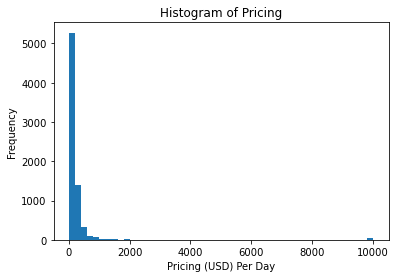

In [91]:
# visualize distribution of price (target variable)
plt.hist(pickle_listings_df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

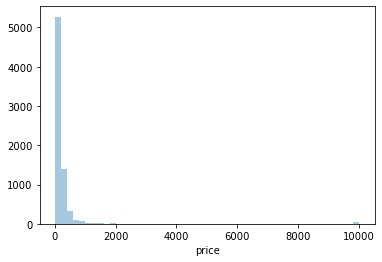

In [92]:
sns.distplot(pickle_listings_df['price'], kde=False,bins=50)

## Filter out Price Outliers

In [93]:
IQR_value = 633 #based on price box plot from SF EDA notebook -> 3*IQR value
pickleprice_filtered_df = pickle_listings_df[pickle_listings_df.price <= IQR_value]
pickleprice_filtered_df["price"].describe(percentiles=[0.1,0.25, 0.5, 0.75,0.9])

count    6982.000000
mean      165.477050
std       111.730612
min        10.000000
10%        60.000000
25%        85.000000
50%       135.000000
75%       205.000000
90%       313.900000
max       633.000000
Name: price, dtype: float64

## Log Transform 'Price' column

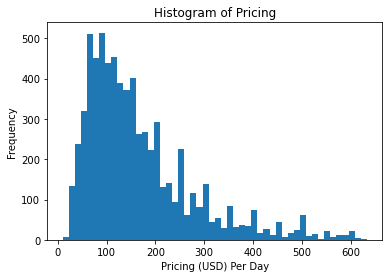

In [94]:
# visualize distribution of price (target variable)
plt.hist(pickleprice_filtered_df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

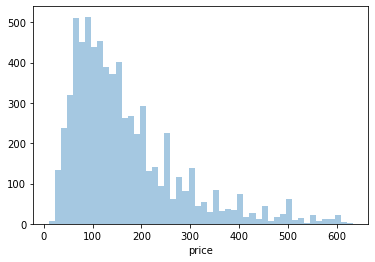

In [95]:
sns.distplot(pickleprice_filtered_df['price'], kde=False,bins=50)

In [96]:
# log transform the response 'price'
pickleprice_filtered_df['price_log'] = pickleprice_filtered_df['price'].apply(lambda x: math.log(x))

<ipython-input-96-294f4ec19fb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickleprice_filtered_df['price_log'] = pickleprice_filtered_df['price'].apply(lambda x: math.log(x))


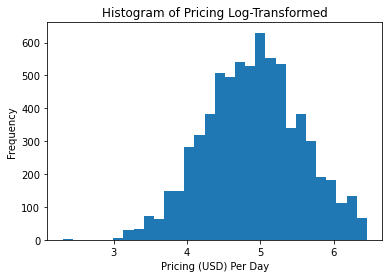

In [97]:
# visualize distribution of price (target variable)
plt.hist(pickleprice_filtered_df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

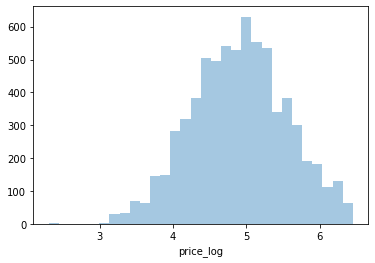

In [98]:
sns.distplot(pickleprice_filtered_df['price_log'], kde=False,bins=30)

In [99]:
pickleprice_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6982 entries, 0 to 7273
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6982 non-null   int64  
 1   host_response_time      6982 non-null   object 
 2   host_response_rate      6982 non-null   float64
 3   host_acceptance_rate    6982 non-null   float64
 4   host_is_superhost       6982 non-null   int32  
 5   host_listings_count     6982 non-null   int64  
 6   neighbourhood_cleansed  6982 non-null   object 
 7   property_type           6982 non-null   object 
 8   room_type               6982 non-null   object 
 9   accommodates            6982 non-null   int64  
 10  bathrooms               6982 non-null   float64
 11  bedrooms                6982 non-null   float64
 12  beds                    6982 non-null   float64
 13  amenities               6982 non-null   object 
 14  price                   6982 non-null   

In [100]:
# pickleprice_filtered_df.to_pickle('cleaned_price_df_with_id.pkl', protocol=3)


price_df = pd.read_pickle('cleaned_price_df_with_id.pkl')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6982 entries, 0 to 7273
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6982 non-null   int64  
 1   host_response_time      6982 non-null   object 
 2   host_response_rate      6982 non-null   float64
 3   host_acceptance_rate    6982 non-null   float64
 4   host_is_superhost       6982 non-null   int32  
 5   host_listings_count     6982 non-null   int64  
 6   neighbourhood_cleansed  6982 non-null   object 
 7   property_type           6982 non-null   object 
 8   room_type               6982 non-null   object 
 9   accommodates            6982 non-null   int64  
 10  bathrooms               6982 non-null   float64
 11  bedrooms                6982 non-null   float64
 12  beds                    6982 non-null   float64
 13  amenities               6982 non-null   object 
 14  price                   6982 non-null   

## Drop columns based on Pearson Correlation (refer to Price Analysis notebook)

In [101]:
price_df = price_df.drop(columns=['bedrooms','beds','maximum_nights','number_of_reviews'])

## Check and drop duplicates if any

In [102]:
print(price_df.duplicated().any())
if price_df.duplicated().any():
    duplicate_rows = price_df[price_df.duplicated()]
    price_df = price_df.drop_duplicates()
    print("Duplicates Removed")
print(price_df.duplicated().any())

False
False


## Drop problematic price (refer to Price Analysis notebook)

In [103]:
price_df[price_df['price'] == 68].shape

(28, 17)

In [104]:
price_df = price_df[price_df['price'] != 68]

In [105]:
price_df[price_df['price'] == 68]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,amenities,price,minimum_nights,review_scores_rating,reviews_per_month,price_log


In [106]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 0 to 7273
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6954 non-null   int64  
 1   host_response_time      6954 non-null   object 
 2   host_response_rate      6954 non-null   float64
 3   host_acceptance_rate    6954 non-null   float64
 4   host_is_superhost       6954 non-null   int32  
 5   host_listings_count     6954 non-null   int64  
 6   neighbourhood_cleansed  6954 non-null   object 
 7   property_type           6954 non-null   object 
 8   room_type               6954 non-null   object 
 9   accommodates            6954 non-null   int64  
 10  bathrooms               6954 non-null   float64
 11  amenities               6954 non-null   object 
 12  price                   6954 non-null   float64
 13  minimum_nights          6954 non-null   int64  
 14  review_scores_rating    6954 non-null   

## Import to pkl file for Sentiment Analysis

In [107]:
# price_df.to_pickle('cleaned_df_with_id_without_encode.pkl', protocol=3)


price_df = pd.read_pickle('cleaned_df_with_id_without_encode.pkl')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 0 to 7273
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6954 non-null   int64  
 1   host_response_time      6954 non-null   object 
 2   host_response_rate      6954 non-null   float64
 3   host_acceptance_rate    6954 non-null   float64
 4   host_is_superhost       6954 non-null   int32  
 5   host_listings_count     6954 non-null   int64  
 6   neighbourhood_cleansed  6954 non-null   object 
 7   property_type           6954 non-null   object 
 8   room_type               6954 non-null   object 
 9   accommodates            6954 non-null   int64  
 10  bathrooms               6954 non-null   float64
 11  amenities               6954 non-null   object 
 12  price                   6954 non-null   float64
 13  minimum_nights          6954 non-null   int64  
 14  review_scores_rating    6954 non-null   

## Create lists for different data type columns

In [509]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = price_df.select_dtypes(include=numerics).columns.to_list()
bool_columns = price_df.select_dtypes(include='bool').columns.to_list()
object_columns = price_df.select_dtypes(include='object').columns.to_list()
print(object_columns)

['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities']


## Convert boolean columns to numeric columns

In [510]:
for column in bool_columns:
    price_df[column] = price_df[column].replace(False,0,regex=True)
    price_df[column] = price_df[column].replace(True,1,regex=True)
price_df["host_is_superhost"].head()

0    1
1    0
2    0
3    0
5    1
Name: host_is_superhost, dtype: int32

## Transforming amenities to numeric columns

In [511]:
price_df.amenities = price_df.amenities.str.replace('"', "")
price_df.amenities = price_df.amenities.str.replace("[", "")
price_df.amenities = price_df.amenities.str.replace("]", "")
price_df['amenities'].head()

0    Heating, Hot water, Stove, Iron, Dryer, Coffee...
1    Smoke alarm, Heating, Kitchen, First aid kit, ...
2    Host greets you, Heating, Hot water, Kitchen, ...
3    Host greets you, Heating, Hot water, Kitchen, ...
5    Heating, Hot water, Children\u2019s books and ...
Name: amenities, dtype: object

In [512]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(', '))
amenities = count_vectorizer.fit_transform(price_df['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

## Combining numeric and boolean columns

In [513]:
listings_new = price_df[numeric_columns+bool_columns]
listings_new.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,price,minimum_nights,review_scores_rating,reviews_per_month,price_log
0,1.0,0.99,1,1,3,1.0,132.0,2,97.0,1.91,4.882802
1,0.6,0.83,0,2,5,1.0,235.0,30,98.0,0.81,5.459586
2,1.0,1.00,0,10,2,4.0,56.0,32,84.0,0.14,4.025352
3,1.0,1.00,0,10,2,4.0,56.0,32,93.0,0.11,4.025352
5,1.0,0.96,1,2,3,1.0,169.0,1,98.0,5.47,5.129899


## Transforming categorical columns to numeric columns and combine all into new df

In [514]:
for categorical_col in object_columns[:-1]:
    listings_new = pd.concat([listings_new, pd.get_dummies(price_df[categorical_col])], axis=1)

## Combine all that with amenities df created in #4

In [515]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')
listings_new.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,price,minimum_nights,review_scores_rating,reviews_per_month,...,table corner guards,terrace,tv,walk in closet,washer,waterfront,wet bar,wifi,window guards,wine cooler
0,1.0,0.99,1,1,3,1.0,132.0,2,97.0,1.91,...,0,0,1,0,1,0,0,1,0,0
1,0.6,0.83,0,2,5,1.0,235.0,30,98.0,0.81,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1.00,0,10,2,4.0,56.0,32,84.0,0.14,...,0,0,1,0,1,0,0,1,0,0
3,1.0,1.00,0,10,2,4.0,56.0,32,93.0,0.11,...,0,0,1,0,1,0,0,1,0,0
5,1.0,0.96,1,2,3,1.0,169.0,1,98.0,5.47,...,0,0,1,0,1,0,0,1,0,0


## Check and drop duplicates if any

In [516]:
print(listings_new.duplicated().any())
if listings_new.duplicated().any():
    duplicate_rows = listings_new[listings_new.duplicated()]
    listings_new = listings_new.drop_duplicates()
    print("Duplicates Removed")
print(listings_new.duplicated().any())

True
Duplicates Removed
False


In [517]:
listings_new.columns = \
['host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'accommodates',
 'bathrooms',
 'price',
 'minimum_nights',
 'review_scores_rating',
 'reviews_per_month',
 'price_log',
 '-',
 'a few days or more',
 'within a day',
 'within a few hours',
 'within an hour',
 'Bayview',
 'Bernal Heights',
 'Castro/Upper Market',
 'Chinatown',
 'Crocker Amazon',
 'Diamond Heights',
 'Downtown/Civic Center',
 'Excelsior',
 'Financial District',
 'Glen Park',
 'Golden Gate Park',
 'Haight Ashbury',
 'Inner Richmond',
 'Inner Sunset',
 'Lakeshore',
 'Marina',
 'Mission',
 'Nob Hill',
 'Noe Valley',
 'North Beach',
 'Ocean View',
 'Outer Mission',
 'Outer Richmond',
 'Outer Sunset',
 'Pacific Heights',
 'Parkside',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'Seacliff',
 'South of Market',
 'Treasure Island/YBI',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition',
 'Boat',
 'Casa particular',
 'Earth house',
 'Entire apartment',
 'Entire bungalow',
 'Entire cabin',
 'Entire condominium',
 'Entire cottage',
 'Entire floor',
 'Entire guest suite',
 'Entire guesthouse',
 'Entire house',
 'Entire in-law',
 'Entire loft',
 'Entire place',
 'Entire serviced apartment',
 'Entire townhouse',
 'Entire villa',
 'Private room (Property Type)',
 'Private room in apartment',
 'Private room in bed and breakfast',
 'Private room in bungalow',
 'Private room in cabin',
 'Private room in castle',
 'Private room in condominium',
 'Private room in cottage',
 'Private room in earth house',
 'Private room in guest suite',
 'Private room in guesthouse',
 'Private room in hostel',
 'Private room in house',
 'Private room in hut',
 'Private room in loft',
 'Private room in resort',
 'Private room in serviced apartment',
 'Private room in townhouse',
 'Private room in villa',
 'Room in aparthotel',
 'Room in bed and breakfast',
 'Room in boutique hotel',
 'Room in hostel',
 'Room in hotel',
 'Room in serviced apartment',
 'Shared room in apartment',
 'Shared room in bed and breakfast',
 'Shared room in boutique hotel',
 'Shared room in bungalow',
 'Shared room in condominium',
 'Shared room in hostel',
 'Shared room in house',
 'Shared room in loft',
 'Shared room in townhouse',
 'Shared room in villa',
 'Tiny house',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room',
 'air conditioning',
 'alarm system',
 'baby bath',
 'baby monitor',
 'babysitter recommendations',
 'baking sheet',
 'barbecue utensils',
 'bathroom essentials',
 'bathtub',
 'bbq grill',
 'beach essentials',
 'beachfront',
 'bed linens',
 'bedroom comforts',
 'bread maker',
 'breakfast',
 'breakfast bar',
 'building staff',
 'cable tv',
 'carbon monoxide alarm',
 'changing table',
 'children\\u2019s books and toys',
 'children\\u2019s dinnerware',
 'cleaning before checkout',
 'coffee maker',
 'cooking basics',
 'crib',
 'desk',
 'dishes and silverware',
 'dishwasher',
 'dryer',
 'dual vanity',
 'elevator',
 'essentials',
 'ethernet connection',
 'ev charger',
 'extra pillows and blankets',
 'fire extinguisher',
 'fireplace guards',
 'first aid kit',
 'free parking on premises',
 'free street parking',
 'full kitchen',
 'game console',
 'garden or backyard',
 'gas fireplace',
 'gym',
 'hair dryer',
 'hangers',
 'heating',
 'high chair',
 'host greets you',
 'hot tub',
 'hot water',
 'indoor fireplace',
 'iron',
 'ironing board',
 'jetted tub',
 'keypad',
 'kitchen',
 'kitchenette',
 'lake access',
 'laptop-friendly workspace',
 'lock on bedroom door',
 'lockbox',
 'long term stays allowed',
 'luggage dropoff allowed',
 'microwave',
 'mini fridge',
 'natural gas barbeque',
 'office',
 'outlet covers',
 'oven',
 'pack \\u2019n play/travel crib',
 'paid parking off premises',
 'paid parking on premises',
 'patio or balcony',
 'pets allowed',
 'piano',
 'pocket wifi',
 'pool',
 'portable air conditioning',
 'private entrance',
 'private hot tub',
 'private living room',
 'refrigerator',
 'room-darkening shades',
 'security cameras',
 'self check-in',
 'shampoo',
 'shared hot tub',
 'shower gel',
 'single level home',
 'ski-in/ski-out',
 'smart home technology',
 'smart lock',
 'smart tv',
 'smoke alarm',
 'smoking allowed',
 'sonos sound system',
 'stair gates',
 'stand alone bathtub',
 'stand alone rain shower',
 'stove',
 'suitable for events',
 'table corner guards',
 'terrace',
 'tv',
 'walk in closet',
 'washer',
 'waterfront',
 'wet bar',
 'wifi',
 'window guards',
 'wine cooler']

In [518]:
listings_new.drop(columns=['-'],inplace=True)

In [519]:
listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6396 entries, 0 to 6812
Columns: 225 entries, host_response_rate to wine cooler
dtypes: float64(7), int32(1), int64(118), uint8(99)
memory usage: 6.8 MB


## Import to pkl file for cleaned df with encode

In [520]:
# listings_new.to_pickle('cleaned_df_with_encode.pkl')


listings_new = pd.read_pickle('cleaned_df_with_encode.pkl')
listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6396 entries, 0 to 6812
Columns: 225 entries, host_response_rate to wine cooler
dtypes: float64(7), int32(1), int64(118), uint8(99)
memory usage: 6.8 MB


# calendar.csv Pre-processing

In [120]:
calendar_df = pd.read_csv("../raw_data/calendar.csv")
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132441,2020-08-16,t,$75.00,$75.00,1.0,10.0
1,25463,2020-08-15,t,$110.00,$110.00,2.0,29.0
2,25463,2020-08-16,t,$110.00,$110.00,2.0,29.0
3,25463,2020-08-17,t,$110.00,$110.00,2.0,29.0
4,25463,2020-08-18,t,$110.00,$110.00,2.0,29.0


## Checking structure and data types

In [121]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655067 entries, 0 to 2655066
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 141.8+ MB


In [122]:
calendar_df.loc[calendar_df['price'] != calendar_df['adjusted_price']]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1729,27025,2020-08-15,f,$165.00,$157.00,30.0,1125.0
1730,27025,2020-08-16,f,$165.00,$157.00,30.0,1125.0
1731,27025,2020-08-17,f,$165.00,$157.00,30.0,1125.0
1732,27025,2020-08-18,f,$165.00,$157.00,30.0,1125.0
1733,27025,2020-08-19,f,$165.00,$157.00,30.0,1125.0
...,...,...,...,...,...,...,...
2648492,44139093,2021-08-10,t,$280.00,$252.00,30.0,1125.0
2648493,44139093,2021-08-11,t,$280.00,$252.00,30.0,1125.0
2648494,44139093,2021-08-12,t,$280.00,$252.00,30.0,1125.0
2648495,44139093,2021-08-13,t,$280.00,$252.00,30.0,1125.0


## Fixing wrong data types

In [123]:
# convert to datetime
calendar_df['date'] =pd.to_datetime(calendar_df['date'])

# convert $ to float
calendar_df[['price','adjusted_price']]=\
calendar_df[['price','adjusted_price']].apply(lambda x: x.str.replace('$', ''))
calendar_df[['price','adjusted_price']].head()
calendar_df[['price','adjusted_price']]=\
calendar_df[['price','adjusted_price']].apply(lambda x: x.str.replace(',', '')).astype(float)

# convert to bool
calendar_df['available'] = np.where(calendar_df['available'] == "t", True, False)
                           
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655067 entries, 0 to 2655066
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 124.1 MB


In [124]:
calendar_df.describe(percentiles=[0.25, 0.5, 0.75],include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,2.655067e+06,2655067,2655067,2.655067e+06,2.655067e+06,2.655026e+06,2.655026e+06
unique,NaN,366,2,NaN,NaN,NaN,NaN
top,NaN,2021-03-07 00:00:00,False,NaN,NaN,NaN,NaN
freq,NaN,7274,1427391,NaN,NaN,NaN,NaN
first,NaN,2020-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2.311018e+07,NaN,NaN,2.347354e+02,2.344819e+02,1.378462e+04,5.965051e+06
std,1.416490e+07,NaN,NaN,5.564862e+02,5.562994e+02,1.172417e+06,1.128922e+08
min,9.580000e+02,NaN,NaN,1.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00
25%,1.027357e+07,NaN,NaN,9.100000e+01,9.100000e+01,2.000000e+00,6.000000e+01


In [125]:
calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0


In [126]:
print(calendar_df.date.min())

2020-08-15 00:00:00


In [127]:
print(calendar_df.date.max())

2021-08-15 00:00:00


## Checking and filling null values

In [128]:
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    41
maximum_nights    41
dtype: int64

In [129]:
print(calendar_df.maximum_nights.min())

1.0


In [130]:
calendar_df.fillna(0,inplace=True) 
calendar_df.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

## Importing cleaned data to pickle file

In [131]:
#calendar_df.to_pickle('cleaned_calendar.pkl')


pickle_calendar_df = pd.read_pickle('cleaned_calendar.pkl')
pickle_calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0


## Further breakdown to date column for EDA later

In [132]:
calendar_df['dow'] = pd.DatetimeIndex(calendar_df['date']).dayofweek
calendar_df['doy'] = pd.DatetimeIndex(calendar_df['date']).dayofyear
calendar_df['year'] = pd.DatetimeIndex(calendar_df['date']).year
calendar_df['month'] = pd.DatetimeIndex(calendar_df['date']).month
calendar_df['quarter'] = pd.DatetimeIndex(calendar_df['date']).quarter
#calendar_df['hour'] = data.index.hour
calendar_df['weekday'] = pd.DatetimeIndex(calendar_df['date']).day_name()
calendar_df['woy'] = pd.DatetimeIndex(calendar_df['date']).weekofyear
calendar_df['dom'] = pd.DatetimeIndex(calendar_df['date']).day # Day of Month

calendar_df['season'] = calendar_df['month'].apply(lambda month_number: (month_number%12 + 3)//3)

In [133]:
calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dow,doy,year,month,quarter,weekday,woy,dom,season
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0,6,229,2020,8,3,Sunday,33,16,3
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0,5,228,2020,8,3,Saturday,33,15,3
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0,6,229,2020,8,3,Sunday,33,16,3
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0,0,230,2020,8,3,Monday,34,17,3
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0,1,231,2020,8,3,Tuesday,34,18,3


## Import to pickle with newly added date breakdown columns

In [134]:
#calendar_df.to_pickle('cleaned_calendar_with_dt.pkl')


pickle_calendar_df_with_dt = pd.read_pickle('cleaned_calendar_with_dt.pkl')
pickle_calendar_df_with_dt.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dow,doy,year,month,quarter,weekday,woy,dom,season
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0,6,229,2020,8,3,Sunday,33,16,3
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0,5,228,2020,8,3,Saturday,33,15,3
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0,6,229,2020,8,3,Sunday,33,16,3
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0,0,230,2020,8,3,Monday,34,17,3
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0,1,231,2020,8,3,Tuesday,34,18,3


## Check for duplicate rows

In [135]:
pickle_calendar_df_with_dt[pickle_calendar_df_with_dt.duplicated()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dow,doy,year,month,quarter,weekday,woy,dom,season


In [136]:
pickle_calendar_df[pickle_calendar_df.duplicated()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
